## Email topic modeling using LDA and gensim

## Load Data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
file_name = '.\\Downloads\\n16.xlsx'
xl_file = pd.ExcelFile(file_name, engine='openpyxl', )
df = xl_file.parse('Feuil1')
messages = df['Body']

In [3]:
type(messages)

pandas.core.series.Series

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Subject                      3123 non-null   object        
 1   Date Sent                    3126 non-null   datetime64[ns]
 2   Body                         3126 non-null   object        
 3   Categories                   485 non-null    object        
 4   Attachment Names and Size    155 non-null    object        
 5   Date Received                3115 non-null   datetime64[ns]
 6   Creator Name                 0 non-null      float64       
 7   From (address)               3115 non-null   object        
 8   Sent on behalf of (address)  3115 non-null   object        
 9   To (address)                 3113 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 244.3+ KB


## Cleaning the Data

In [5]:
## Preprocessing : 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Preprocess text messages

# Replace URLs with 'webaddress'
processed = messages.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', '')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  '')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', '')


#remove _

processed = processed.str.replace('_','')

# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

# change words to lower case 
processed = processed.str.lower()

# remove french stop words from text messages

stop_words = set(stopwords.words('french'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# remove english stop words from text messages

stop_words = set(stopwords.words('english'))
#stop_words.add('bonjour')
stop_words.add('please')
stop_words.add('mailto')
stop_words.add('mail')
stop_words.add('numbr')
#stop_words.add('cordialement')
stop_words.add('e')
stop_words.add('virus')
stop_words.add('antiphishing')
stop_words.add('merci')
stop_words.add('com')
stop_words.add('fr')
stop_words.add('https')
stop_words.add('bjenumbrywvybnumbrbhcmnaznumbrjvdxbllwlkzweuynumbrt')
stop_words.add('airbus')
stop_words.add('idea')
stop_words.add('nnumbraeroparc')
stop_words.add('groupe')
stop_words.add('bjeywvybbhcmnazjvdxbllwlkzweuyt')
stop_words.add('naeroparc')
stop_words.add('proxy')
stop_words.add('www')
stop_words.add('wa')
stop_words.add('reher')
stop_words.add('msv')
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [6]:
## Pure Body

start_greetings = ['bonjour']
end_greetings = ['cordialement', 'cdlt']

for i in range(len(processed)) :
    start = 0
    end = 0
    s = processed[i].split()
    for j in range(len(s)):
        if s[j] in start_greetings:
            start = j
            break
    for j in range(len(s)):
        if s[j]  in end_greetings :
            end = j
            break

    pure_body = " "
    x = s[start+1:end]
    pure_body=" ".join(map(str,x))
    processed[i] = pure_body

In [7]:
names = pd.read_csv('.\\Downloads\\analyses-trails-in-france-prenoms-hf.csv')  

In [8]:
def extract_entities(text, filter=[]):
    doc = nlp_lg(text)
    entities = [{x.label_: x.text} for x in doc.ents if x.label_ in filter]
    return entities

In [9]:
#processed[0]

In [10]:
def replace_substring(string, substr, new):
    
    i = 0
    while i < len(string) - len(substr) + 1:
        # Check if substring starts at i
        #print(string[i:i+len(substr)])
        if string[i:i+len(substr)] == substr:
            v = string[:i]+new+string[i+len(substr):]
            string = v
            break   
        i += 1
    
    return string

In [11]:
prénoms = names['Unnamed: 0'].to_list()
prénoms = prénoms[1:]
prénoms = [str(x).lower() for x in prénoms]


In [12]:
for i in range(len(processed)) :
    element = processed[i]
    for s in element.split():
        if s in prénoms :
            element = replace_substring(element, s, '')
            processed[i] = element

## Document term matrix

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(processed)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = processed.index
data_dtm

,aaa,aaaefcc,abaecabaa,abbdcdcefcd,aberthet,abimée,abimées,abl,abord,absence,...,éventuellement,évidemment,évidences,évitant,éviter,évolution,évoqué,évoquée,être,œil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Topic modeling : attempt 1

In [14]:
#!pip install gensim

In [15]:
#!pip show Numpy

In [16]:
from gensim import matutils, models
import scipy.sparse

In [17]:
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaefcc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abaecabaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbdcdcefcd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aberthet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [19]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [20]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=100,random_state=42)
lda.print_topics()

[(0,
  '0.030*"bonne" + 0.029*"réception" + 0.025*"souhaitant" + 0.024*"trigo" + 0.022*"group" + 0.016*"gomulka" + 0.016*"bien" + 0.015*"svp" + 0.013*"caisse" + 0.012*"pièce"'),
 (1,
  '0.024*"msn" + 0.015*"nt" + 0.013*"pièces" + 0.013*"caisses" + 0.011*"si" + 0.010*"réception" + 0.009*"besoin" + 0.009*"stock" + 0.008*"faire" + 0.008*"bien"'),
 (2,
  '0.027*"external" + 0.021*"joyau" + 0.018*"msn" + 0.012*"production" + 0.012*"daher" + 0.012*"écrit" + 0.011*"veilly" + 0.009*"mobile" + 0.009*"thanks" + 0.007*"bonjour"'),
 (3,
  '0.018*"référence" + 0.017*"pièces" + 0.016*"qté" + 0.012*"ci" + 0.011*"livraison" + 0.011*"reçue" + 0.010*"svp" + 0.010*"pouvez" + 0.010*"attendue" + 0.010*"erreur"'),
 (4,
  '0.038*"aeroparc" + 0.026*"stelia" + 0.026*"voiture" + 0.026*"lettre" + 0.024*"aerospace" + 0.023*"balso" + 0.023*"gedmouv" + 0.023*"boreception" + 0.019*"chargement" + 0.018*"veuillez"')]

In [21]:
l = lda.get_document_topics(corpus[5])
for i,j in l:
    print(i)
    print(j)

0
0.72981024
1
0.06934121
2
0.0667985
3
0.067377225
4
0.06667286


## Grouping documents of the same topic 

In [22]:
len(corpus)

3126

In [23]:
## Assembling decuments of the same topic

topics =[[] for _ in range(5)]

for i in range(len(corpus)):
    temp = []
    for e,j in lda.get_document_topics(corpus[i]):
        temp.append(j)
    k = temp.index(max(temp))
    topics[k].append(i)
    

In [24]:
df["Subject"] = df["Subject"].astype("string")

In [25]:
df[['Subject']]=df[['Subject']].fillna('')

In [26]:
df.isna().sum()

Subject                           0
Date Sent                         0
Body                              0
Categories                     2641
Attachment Names and Size      2971
Date Received                    11
Creator Name                   3126
From (address)                   11
Sent on behalf of (address)      11
To (address)                     13
dtype: int64

In [27]:
##Text preprocessing



subjects = df['Subject']


# change words to lower case 
processed = subjects.str.lower()

# Remove re: tr: et fw: fwd:
processed = processed.str.replace('re:',' ')
processed = processed.str.replace('tr:',' ')
processed = processed.str.replace('fw:',' ')
processed = processed.str.replace('fwd:',' ')
processed = processed.str.replace('fw',' ')

# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

#remove _

processed = processed.str.replace('_',' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')



# remove numbers 
processed = processed.str.replace(r'\d+(\.\d+)?', '')

# remove stop words 

stop_words = set(stopwords.words('english'))
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [28]:
##Creating a document term matrix

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(processed)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = processed.index
X = data_dtm.to_numpy()

In [29]:
X.shape

(3126, 813)

In [30]:
subjects = processed.to_list()
topic_subjects = [[] for _ in range(5)]
sbj = [[] for _ in range(5)]
for i in range(len(topic_subjects)):
    topic_subjects[i] = [X[k,:] for k in topics[i]]
    sbj[i] = [subjects[k] for k in topics[i]]
    

In [31]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1,vector2)/(np.sqrt(np.sum(vector1**2))*np.sqrt(np.sum(vector2**2)))

In [32]:
import numpy as np
top_subjects = []
for i in range(len(topic_subjects)) :
    liste = topic_subjects[i]
    l = []
    for element in liste:
        s = 0
        
        for e in liste:
            s = s+cosine_similarity(element,e)
        l.append(s)
    top_subjects.append(sbj[i][l.index(max(l))])

In [33]:
top_subjects

['servitude lèvres',
 'radôme radta',
 'msn magasin ns livraison pour fal toulouse',
 'taxi colis nantes st nazaire',
 'ot non prélevé']

In [34]:
# from wordcloud import WordCloud
# ##Plot wordcloud
# allwords = ' '.join([x for x in processed])
# wordCloud = WordCloud(width = 500,height = 300, random_state = 21,max_font_size = 119).generate(allwords)

# plt.imshow(wordCloud,interpolation = 'bilinear')
# plt.axis("off")
# plt.show()

## Topic modeling avec une liste de topics pré-définie

In [70]:
t1 = 'recherche colis'
t2 = 'paramétrage couronne'
t3 = 'écart stock'
t4 = 'bl manquant'
t5 = 'éxpedition aeroparc'
t6 = 'caisses vides'
t7 = 'erreur référence'
liste_de_topics = [t1,t2,t3,t4,t5,t6,t7]

In [71]:
df = xl_file.parse('Feuil1')
df["Subject"] = df["Subject"].astype("string")
df[['Subject']]=df[['Subject']].fillna('')
data =df["Subject"] + df['Body'].astype(str) 


In [72]:
data
## Preprocessing : 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Preprocess text messages

# Replace URLs with 'webaddress'
processed = data.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', '')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  '')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', '')


#remove _

processed = processed.str.replace('_','')

# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

# change words to lower case 
processed = processed.str.lower()

# remove french stop words from text messages

stop_words = set(stopwords.words('french'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# remove english stop words from text messages

stop_words = set(stopwords.words('english'))
#stop_words.add('bonjour')
stop_words.add('please')
stop_words.add('mailto')
stop_words.add('mail')
stop_words.add('numbr')
#stop_words.add('cordialement')
stop_words.add('e')
stop_words.add('virus')
stop_words.add('antiphishing')
stop_words.add('merci')
stop_words.add('com')
stop_words.add('fr')
stop_words.add('https')
stop_words.add('bjenumbrywvybnumbrbhcmnaznumbrjvdxbllwlkzweuynumbrt')
stop_words.add('airbus')
stop_words.add('idea')
stop_words.add('nnumbraeroparc')
stop_words.add('groupe')
stop_words.add('bjeywvybbhcmnazjvdxbllwlkzweuyt')
stop_words.add('naeroparc')
stop_words.add('proxy')
stop_words.add('www')
stop_words.add('wa')
stop_words.add('reher')
stop_words.add('msv')
data = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [73]:
data = data.append(pd.Series(liste_de_topics),ignore_index = True)

In [74]:
##Creating a document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index
X = data_dtm.to_numpy()

In [75]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1,vector2)/(np.sqrt(np.sum(vector1**2))*np.sqrt(np.sum(vector2**2)))

In [76]:
df['Topic']=''
df['Similarity Score']=0

In [77]:
def index_max(l):
    idx = []
    for i,e in enumerate(l):
        if e == max(l):
            idx.append(i)
    return idx

In [78]:
import numpy as np
sim = [0,0,0,0,0,0,0]
k = []
for i, row in df.iterrows():
    for j in range(7):
        sim[j] = cosine_similarity(X[(X.shape[0]-7)+j,:],X[i,:])
        idx = index_max(sim)
        if len(idx)==1:
            if sim[idx[0]]>0.2:
                for k in range(7):
                
                    if idx[0]==k:
                    
                        df.at[i, 'Topic'] = liste_de_topics[k]
                        df.at[i,'Similarity Score'] = sim[idx[0]]
#             elif idx[0]==2:
#                 df.at[i, 'PostCondition'] = 1
#             elif idx[0]==3:
#                 df.at[i, 'PostCondition'] = 2
#             elif idx[0]==4:
#                 df.at[i, 'PostCondition'] = 3
#         elif len(idx)==5:
#             if row['ImpactScore']<3.4:
#                 df.at[i, 'PostCondition'] = 4
#             elif row['ImpactScore'] == 5.9 :
#                 df.at[i, 'PostCondition'] = 0


In [79]:
df

,Subject,Date Sent,Body,Categories,Attachment Names and Size,Date Received,Creator Name,From (address),Sent on behalf of (address),To (address),Topic,Similarity Score
0,RE: Servitude Lèvres A320,2021-09-08 10:47:41,"Bonjour Ghislain, Demande bien prise en c...",NaN,NaN,2021-09-08 10:47:42,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,ghislain.gaudin@airbus.com;/o=ExchangeLabs/ou=...,,0.0
1,Servitude Lèvres A320,2021-09-08 10:37:11,"Bonjour, Vous avez actuellement 2 lèvres Lisi...",NaN,NaN,2021-09-08 10:38:34,NaN,ghislain.gaudin@airbus.com,ghislain.gaudin@airbus.com,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
2,Disponibilité USM - 08/09/2021,2021-09-08 10:13:06,"Bonjour, Vous trouverez ci-joint la disponibi...",NaN,NaN,2021-09-08 10:17:41,NaN,via@kizeo.com,via@kizeo.com,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3,Re: RADTA4197,2021-09-08 09:19:58,"merci Le mer. 8 sept. 2021 à 09:11, n16aero...",NaN,NaN,2021-09-08 09:20:16,NaN,vanessa.drugeon@airbus.com,vanessa.drugeon@airbus.com,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
4,Re: Taxi colis nantes - St Nazaire,2021-09-08 09:13:58,Merci à tous pour votre efficacité. Tristan ...,NaN,NaN,2021-09-08 09:14:21,NaN,tristan.t.barat@airbus.com,tristan.t.barat@airbus.com,Altp.ct.airbus@dhl.com,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3121,TR: Caisse de transport,2021-02-01 16:39:06,"Bonjour, Avez-vous des caisses de ce type...",Romina,NaN,2021-02-01 16:39:06,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3122,Speed Up 208022783,2021-02-01 16:34:38,"Pouvez-vous traiter la Speed Up 208022783, SVP...",NaN,NaN,2021-02-01 16:35:33,NaN,frederic.noireaux@airbus.com,frederic.noireaux@airbus.com,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3123,Caisse de transport,2021-02-01 16:26:19,"Bonjour, Pouvez-vous me dire si vous avez des...",NaN,NaN,2021-02-01 16:26:34,NaN,marivonig.gaillard.external@airbus.com,marivonig.gaillard.external@airbus.com,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3124,RE: HELP : accord TAXI / - stock zéro - réf. D...,2021-02-01 13:06:01,"Bonjour Madame, Je vous remercie, je vais ...",NaN,NaN,2021-02-01 13:06:11,NaN,Altp.ct.airbus@dhl.com,Altp.ct.airbus@dhl.com,elouann.volant@airbus.com;/o=ExchangeLabs/ou=E...,,0.0


0.521356001727143 0.024667328377123567


272

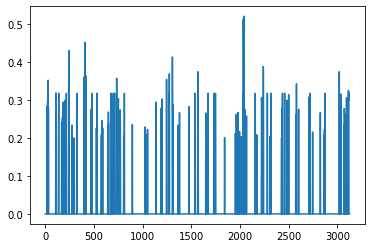

In [80]:
import matplotlib.pyplot as plt
plt.plot(df['Similarity Score'])

#plt.figure(1, figsize=(15,5))
#plt.hist(df['Topic'])
# print(len(df))
print(max(df['Similarity Score']), np.mean(df['Similarity Score']))
len(df[df['Similarity Score']>0.2])


In [81]:
df['Topic'].value_counts()

                        2854
caisses vides             93
erreur référence          92
bl manquant               52
écart stock               23
recherche colis            6
éxpedition aeroparc        4
paramétrage couronne       2
Name: Topic, dtype: int64

In [52]:
df[df['Topic']=='']

,Subject,Date Sent,Body,Categories,Attachment Names and Size,Date Received,Creator Name,From (address),Sent on behalf of (address),To (address),Topic,Similarity Score
7,RE: Appro longeron avant MSN 2023,2021-09-08 09:07:47,"Bonjour, Oui, nous n’avons pas eu de cais...",NaN,(102KB),2021-09-08 09:07:50,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,jean-charles.gendron@airbus.com;/o=ExchangeLab...,,0.0
8,Radôme Radta5039 OF56012540,2021-09-08 09:03:55,"Bonjour Vanessa, Je ne peux pas faire l’e...",NaN,NaN,2021-09-08 09:03:56,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,vanessa.drugeon@airbus.com,,0.0
38,RE: Panneau D5713237420201,2021-09-07 11:41:58,"Fréderic, Peux-tu regarder le mail ci-des...",Romina,NaN,2021-09-07 11:41:59,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,frederic.gomulka@trigo-group.com,,0.0
41,Photo R14,2021-09-07 11:03:53,Envoyé de mon Galaxy A40 Orange,NaN,NaN,2021-09-07 11:03:54,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
44,RE: OF 1012577594,2021-09-07 10:30:56,"Bonjour, C’est pour A330 Cordial...",NaN,NaN,2021-09-07 10:30:57,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,emilien.e.gendron@airbus.com;/o=ExchangeLabs/o...,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,TR: Problème réceptions sur 5 radômes,2021-02-03 14:30:11,Pouvez-vous voir avec le gestionnaire pour évi...,NaN,Radomes030221_03022021142238.pdf (1642KB),2021-02-03 14:30:15,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3069,TR: Problème réceptions sur 5 radômes,2021-02-03 14:29:32,"Sab, Tu peux voir avec la personne qui s...",NaN,Radomes030221_03022021142238.pdf (1642KB),2021-02-03 14:29:37,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3105,LSP000021438 BSQ,2021-02-02 14:35:42,"Bonjour, Pouvez-vous faire un inventaire ...",Romina,NaN,2021-02-02 14:35:43,NaN,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0
3108,demande de réception urgente Raidisseurs,2021-02-02 14:17:44,"Bonjour, Veuillez trouver ci-après les SU pou...",NaN,NaN,2021-02-02 14:17:58,NaN,nicolas.belot.external@airbus.com,nicolas.belot.external@airbus.com,/o=ExchangeLabs/ou=Exchange Administrative Gro...,,0.0


In [47]:

# from transformers import pipeline
# sentiment_pipeline = pipeline(task = 'sentiment-analysis',
#                      model = 'nlptown/bert-base-multilingual-uncased-sentiment',
#                      tokenizer = 'nlptown/bert-base-multilingual-uncased-sentiment')
# #sentiment_pipeline = pipeline("sentiment-analysis")
# # data = ["I love you", "I hate you"]
# # sentiment_pipeline(data)

In [48]:
# #sentiment_pipeline("pièce cassée")
# #Sentiments sur les topic
# sentiments = []
# for i in range(len(topics)):
#     t = topics[i]
#     sen = []
#     for idx in t:
#         text = messages[idx]
#         for element in text.split(','):
#             sen.append(sentiment_pipeline(text)[0]['label'])
#     sentiments.append(sen[sen.index(max(sen))])


In [49]:
sentiments

NameError: name 'sentiments' is not defined